#  Introduction to Pandas
<hr>

`Pandas` is one of the most important data analysis tools in Python for data processing. Built on NumPy, it offers many methods for handling large datasets and allows flexible, efficient data manipulation.

The main data type used in pandas is the `DataFrame`, which is a two-dimensional structure similar to a table in Excel. To use pandas, you first need to import it. In fact, the name 'Pandas' is short for 'panel data'.

In [306]:
import pandas as pd

##  Creating, Reading, and Storing Data
<hr>

### Creating Data
<hr>

For example, consider the following data:
    
 Name|Statistics |Accounting |Makerting
 |:--------:|:--------:|:--------:|:--------:|
 Jim | 85 | 82 | 84  
 Lily | 68 | 63 | 90 
 Jack | 90 | 88 | 78 |

In general, there are two ways to create a DataFrame.

- Create the DataFrame by dictionaries `dict`.
- Create the DataFrame by an `NumPy ndarray` and argumens `columns` or `index`.

In [502]:
import pandas as pd

df = pd.DataFrame(
    {
        "Name": ["Jim", "Lily", "Jack"],
        "Statistics": [85, 68, 90],
        "Accounting": [82, 63, 88],
        "Marketing": [84, 90, 78],
    }
)
print(df)

   Name  Statistics  Accounting  Marketing
0   Jim          85          82         84
1  Lily          68          63         90
2  Jack          90          88         78


Another way to create DataFrame with argument `columns`:

In [311]:
import numpy as np
import pandas as pd

data = np.array([["Jim", 85, 82, 84], ["Lily", 68, 63, 90], ["Jack", 90, 88, 78]])
df2 = pd.DataFrame(data, columns=["Name", "Statistics", "Accounting", "Marketing"])
df2

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


Another way to create DataFrame with both argumens `columns` and `index`:

In [313]:
import numpy as np
import pandas as pd

data = np.array([[85, 82, 84], [68, 63, 90], [90, 88, 78]])
df3 = pd.DataFrame(
    data,
    columns=["Statistics", "Accounting", "Marketing"],
    index=["Jim", "Lily", "Jack"],
)
df3

,Statistics,Accounting,Marketing
Jim,85,82,84
Lily,68,63,90
Jack,90,88,78


In the above outputs, the first row are column lables while the first column are row indices. We can visit them by ``columns`` and ``index``, respectively.

In [315]:
df.columns

Index(['Name', 'Statistics', 'Accounting', 'Marketing'], dtype='object')

In [316]:
df.index

RangeIndex(start=0, stop=3, step=1)

- One column or row data of a DataFrame is called a `Series`.

In [672]:
type(df['Statistics'])

pandas.core.series.Series

- Get the number of rows and columns in a DataFrame by `shape`.

In [504]:
df.shape

(3, 4)

- Get the number of cells in a DataFrame by `size`.

In [506]:
df.size

12

- Get the data types of each column by `dtypes`

In [508]:
df.dtypes

Name          object
Statistics     int64
Accounting     int64
Marketing      int64
dtype: object

Pandas also supports converting one-dimensional or two-dimensional arrays/lists directly into DataFrame format.

In [320]:
a = [1, 2, 3]
pd.DataFrame(a)

,0
0,1
1,2
2,3


In [321]:
a = [[1, 2, 3], [4, 5, 6]]
pd.DataFrame(a)

,0,1,2
0,1,2,3
1,4,5,6


### Reading Data
<hr>

In most cases, we need to read data files (such as Excel files). Suppose the example above is saved in an Excel file named 'transcripts.xlsx' located in the "datas/" directory on your computer. We can read the file using the `read_excel` method:

```python
import pandas as pd

df = pd.read_excel("datas/transcripts.xlsx")
# or df = pd.read_excel("datas\\transcripts.xlsx")
# or df = pd.read_excel(r"datas\transcripts.xlsx")
```

```{note}
- File paths on macOS use the forward slash `/` as a separator, while Windows uses the backslash `\`.

- Adding an `r` before a file path string (e.g., r"path") preserves the original meaning of the string and prevents special characters from being escaped.
```

The syntax for ``read_excel``is:

<table>   
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">
            read_excel(io, sheetname=0, header=0, skiprows=None, index_col=None, encoding=None)
        </th>
    </tr>
    <tr>
        <td style="text-align:left">io</td>
        <td style="text-align:left">The file path and name of the data file, usually provided as a string.</td>
    </tr>
    <tr>
        <td style="text-align:left">sheetname</td>
        <td style="text-align:left">The name or index of the worksheet. Defaults to 0, which reads the first sheet.</td>
    </tr>
    <tr>
        <td style="text-align:left">header</td>
        <td style="text-align:left">The row to use as column names. Defaults to 0, meaning the first row is used as headers.</td>
    </tr>
    <tr>
        <td style="text-align:left">skiprows</td>
        <td style="text-align:left">Number of rows to skip from the top of the file.</td>
    </tr>
    <tr>
        <td style="text-align:left">index_col</td>
        <td style="text-align:left">Column to use as the row labels of the DataFrame.</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">encoding</td>
        <td style="text-align:left">Encoding format, commonly 'gbk' or 'utf-8'.</td>
    </tr>
</table>

```{note}
- When reading certain data files, you may need to add the decoding argument `encoding='gbk'` or `encoding='utf-8'` for proper reading.
```

Another common data file format is CSV. We can simply use Pandas' `read_csv` method, whose syntax is essentially the same as `read_excel`.

### Store the data
<hr>

To save data, use the `to_excel` or `to_csv` method. For example, to save our DataFrame df to the "datas/" folder with the filename "marks.xlsx":

In [330]:
df.to_excel("datas/marks.xlsx")

- The folder must first exists in the computer before using `to_excel` or `to_csv`.
- By default, the row indeices are not written to the file. If you want to include the index in the saved file, you can set `index=True` (the default is index=False).

## Access and change data
<hr>

To quickly view the statistical summary of each column in a DataFrame, you can use the `describe()` method. It includes information such as the number of non-null values, mean, standard deviation, minimum, maximum, and quartiles for each column.

In [333]:
df.describe()

,Statistics,Accounting,Marketing
count,3.000000,3.000000,3.0
mean,81.000000,77.666667,84.0
std,11.532563,13.051181,6.0
min,68.000000,63.000000,78.0
25%,76.500000,72.500000,81.0
50%,85.000000,82.000000,84.0
75%,87.500000,85.000000,87.0
max,90.000000,88.000000,90.0


Additionally, there are several useful method:

| method | Description                       |
| ------- | -------------------------------- |
| `info()` | View the data type of each column |
| `head()` | View the first 5 rows of the data |
| `tail()` | View the last 5 rows of the data  |


### Access the data of a single row, column or cell
<hr>

The simplest way to view a specific column of data is by entering the column name within square brackets `[ ]`. For example, to view the 'Marketing' scores column:

In [336]:
df['Marketing']

0    84
1    90
2    78
Name: Marketing, dtype: int64

To view a particular row of data, use the `loc[ ]` method with the row index.

In [338]:
df.loc[0]  # show the data of the first row

Name          Jim
Statistics     85
Accounting     82
Marketing      84
Name: 0, dtype: object

In [339]:
df.loc[2]  # show the data of the 3rd row

Name          Jack
Statistics      90
Accounting      88
Marketing       78
Name: 2, dtype: object

To view a specific cell, a convenient method is to use double square brackets `[ ][ ]`, with the column label and row index inside each bracket respectively.

In [357]:
df["Marketing"][1]

90

### Acess multi-row or multi-column data
<hr>

To view multiple rows and columns of data, you can use `iloc[ ]`, which not only allows accessing multiple rows and columns but also supports retrieving single rows, single columns, or even individual cell data.。

In [40]:
df.iloc[1] # view the data in the 2nd row

Name          Lily
Statistics      68
Accounting      63
Marketing       90
Name: 1, dtype: object

In [41]:
df.iloc[0:2] # view the data of the first 2 rows

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90


In [42]:
df.iloc[[0, 2]]  # view the data of the 1st and the 3rd rows

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
2,Jack,90,88,78


- View the column data with `[:, ]`.

In [44]:
df.iloc[:, 1]  # view the data of the 2nd column

0    85
1    68
2    90
Name: Statistics, dtype: object

In [45]:
df.iloc[:, 0:2]  # view the data of the first 2 columns

,Name,Statistics
0,Jim,85
1,Lily,68
2,Jack,90


In [46]:
df.iloc[:, [0, 2]]  # view the data of the 1st and 3rd columns

,Name,Accounting
0,Jim,82
1,Lily,63
2,Jack,88


- View the data in a block.

In [48]:
df.iloc[0:2, 0:2] # view the data in the first 2 rows and the first 2 columns

,Name,Statistics
0,Jim,85
1,Lily,68


In [49]:
df.iloc[[0, 2], [0, 2]]  # view the data in row 1 and 3, column 1 and 3

,Name,Accounting
0,Jim,82
2,Jack,88


In [50]:
df.iloc[[0, 2], 0:2]  # view the data in row 1 and 3, column 1 and 2

,Name,Statistics
0,Jim,85
2,Jack,90


- View the data in some cell.

In [52]:
df.iloc[1, 1]  # view the data in the cell of row 1 and column 1

'68'

To view specific columns of data, in addition to using `iloc`, you can **directly pass a list of column labels inside square brackets `[ ]`**.

In [54]:
df[["Statistics", "Marketing"]]

,Statistics,Marketing
0,85,84
1,68,90
2,90,78


It is same as the following:

In [56]:
df.iloc[:, [1, 3]]

,Statistics,Marketing
0,85,84
1,68,90
2,90,78


### View the statistical values of the data
<hr>

Pandas provides built-in statistical method to calculate summary statistics for column data. These method include: `mean()` (average), `max()` (maximum), `min()` (minimum), `median()`, `std()` (standard deviation), `count()`, `skew()` (skewness), `quantile()`, and more. In some cases, you may need to specify the argument `numeric_only=True` to ensure the method is only applied to numeric columns.

- Sometimes we may need to cast the data types to numeric before using those methods.

In [61]:
df["Statistics"].mean()

81.0

In [62]:
# to calculate the average score for each course
# since the first column ('names') is non-numeric, the argument numeric_only=True is added.`
df.mean(numeric_only=True)  

Statistics    81.000000
Accounting    77.666667
Marketing     84.000000
dtype: float64

In [63]:
df["Accounting"].max()

88.0

- Using 'axis=1' to apply the function to rows

In [65]:
df.mean(numeric_only=True, axis=1)  # computer the average score of each student

0    83.666667
1    73.666667
2    85.333333
dtype: float64

###  Revise data
<hr>

When modifying data in a pandas DataFrame, you can assign new values based on pandas index positions: **either assigning a column/row to a single value or to a list with equal length**, using `[ ]` and `.iloc[]`, respectively.

In [67]:
df["Accounting"] = 80  # revise all the accounting scores to 80
df

,Name,Statistics,Accounting,Marketing
0,Jim,85.0,80,84.0
1,Lily,68.0,80,90.0
2,Jack,90.0,80,78.0


In [68]:
df["Accounting"] = [64, 76, 88]  # revise the accounting scores to be the list values
df

,Name,Statistics,Accounting,Marketing
0,Jim,85.0,64,84.0
1,Lily,68.0,76,90.0
2,Jack,90.0,88,78.0


In [69]:
df.iloc[1] = 80  # revise all the values in row 2 to 80
df

,Name,Statistics,Accounting,Marketing
0,Jim,85.0,64,84.0
1,80,80.0,80,80.0
2,Jack,90.0,88,78.0


In [70]:
df.iloc[1] = ["Ella", 95, 90, 89]  # revise all the values in row 2 to the list values
df

,Name,Statistics,Accounting,Marketing
0,Jim,85.0,64,84.0
1,Ella,95.0,90,89.0
2,Jack,90.0,88,78.0


Revise the value in some cell:

In [72]:
df.iloc[1, 1] = 55  
df

,Name,Statistics,Accounting,Marketing
0,Jim,85.0,64,84.0
1,Ella,55.0,90,89.0
2,Jack,90.0,88,78.0


To change the data type of column, using method `astype()`.

In [74]:
df['Marketing'].astype(float)

0    84.0
1    89.0
2    78.0
Name: Marketing, dtype: float64

## Data cleaning
<hr>

### Data replacement ``replace``, ``fillna``
<hr>

When processing data, it is often necessary to perform batch operations on outliers or erroneous values in the raw data. Pandas provides the replace method to facilitate this task conveniently. The first argument of the replace method is the original value in the data, and the second argument is the value to be replaced. 

For example, consider the following student grades:

In [405]:
import pandas as pd

df = pd.DataFrame(
    [[55, 68, 70], [52, 63, 68], [74, 60, 58]],
    columns=["Statistics", "Python", "Finance"],
    index=["Jack", "Lily", "Tom"],
)
df

,Statistics,Python,Finance
Jack,55,68,70
Lily,52,63,68
Tom,74,60,58


Replace the score 68 with 65:

In [371]:
df.replace(68, 65)
df

,Statistics,Python,Finance
Jack,55,68,70
Lily,52,63,68
Tom,74,60,58


The original data does not change. To change the original data, we need addtional argument `inplace=True`.

- The methods ``fillna``, ``drop_duplicates``,``dropna``,``rename`` can also add the argument`inplace=True` to change the original data.

In [373]:
df.replace(68, 65, inplace=True)
df  

,Statistics,Python,Finance
Jack,55,65,70
Lily,52,63,65
Tom,74,60,58


Pandas provides the `fillna` method to batch replace missing values (NaN) in a data table.

- When reading some data files by Pandas, some blank cells will be treated as Numpy's NaN (Not a Number) type.

In [437]:
import numpy as np

df = pd.DataFrame(
    np.array([[55, 68, 70], [52,  np.nan, 68], [74, 60, np.nan]]),
    columns=["Statistics", "Python", "Finance"],
    index=["Jack", "Lily", "Tom"],
)
df

,Statistics,Python,Finance
Jack,55,68,70
Lily,52,nan,68
Tom,74,60,NaN


In [394]:
df.fillna(80)  # replace NaN with 80

,Statistics,Python,Finance
Jack,55.0,68.0,70.0
Lily,52.0,80.0,68.0
Tom,74.0,60.0,80.0


Pandas can sue the method ``isnull``to evaluate whether the cell value is null：

In [396]:
df["Finance"].isnull()

Jack    False
Lily    False
Tom      True
Name: Finance, dtype: bool

### Cast the data type ``astype``
<hr>

Frquently, we need to perform data transformations on raw data. For example, if some numerical values in the original data are stored as text, we must convert them into numeric types before performing subsequent calculations. A commonly used method for data type conversion is `astype`.


In [447]:
import pandas as pd

df = pd.DataFrame(
    [["55", "68", "70"], ["52", "63", "68"], ["74", "60", "58"]],
    columns=["Statistics", "Python", "Finance"],
    index=["Jack", "Lily", "Tom"],
)
df

,Statistics,Python,Finance
Jack,55,68,70
Lily,52,63,68
Tom,74,60,58


- Check the data types of each column by the method `dtypes`.

In [429]:
print(df.dtypes)

Statistics    object
Python        object
Finance       object
dtype: object


We use ``astype`` cast the data type of each folumn to type float.

In [450]:
df[["Statistics", "Python", "Finance"]] = df[["Statistics", "Python", "Finance"]].astype(float)
df

,Statistics,Python,Finance
Jack,55.0,68.0,70.0
Lily,52.0,63.0,68.0
Tom,74.0,60.0,58.0


In [452]:
print(df.dtypes)

Statistics    float64
Python        float64
Finance       float64
dtype: object


We can also change the data type to string or integer by modifying the argument of `astype` to `str` or `int`.

### Remove duplicates ``drop_duplicates``
<hr>

When dealing with large datasets, duplicate data is a common issue. The `drop_duplicates` method can be used to remove redundant entries. For example:

In [461]:
import numpy as np
import pandas as pd

data = np.array([["Jim", 85, 82, 84], ["Jim", 85, 82, 84], ["Lily", 68, 63, 90], ["Jack", 90, 88, 78]])
df = pd.DataFrame(data, columns=["Name", "Statistics", "Accounting", "Marketing"])
df

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Jim,85,82,84
2,Lily,68,63,90
3,Jack,90,88,78


We use ``drop_duplicates`` to drop the identical rows.

In [464]:
df.drop_duplicates()

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
2,Lily,68,63,90
3,Jack,90,88,78


The syntax of drop_duplicates is as follows:

Syntax of the drop_duplicates function:

<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.drop_duplicates(keep='first', inplace=False, ignore_index=False)</th>
    </tr>
    <tr>
        <td rowspan=3 style="text-align:left">keep</td>
        <td style="text-align:left">'first': Keep first occurrence, remove subsequent duplicates (default)</td>
    </tr>
    <tr>
        <td style="text-align:left">'last': Keep last occurrence, remove previous duplicates</td>
    </tr>
    <tr>
        <td style="text-align:left">False: Remove all duplicates</td>
    </tr>
    <tr>
        <td style="text-align:left">inplace</td>
        <td style="text-align:left">If True, modifies the DataFrame in place without returning a new object</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ignore_index</td>
        <td style="text-align:left">If True, the resulting DataFrame's index will be relabeled (default False)</td>
    </tr>
</table>
<br>

### Remove missing values``dropna``
<hr>

``dropna`` can drop the missing values in a Dataframe. Its syntax is as follows:


<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.dropna(axis=0, how='any', thresh=None, inplace=False, ignore_index=False)</th>
    </tr>
    <tr>
        <td style="text-align:left">axis</td>
        <td style="text-align:left">axis=0 drops rows containing missing values, axis=1 drops columns containing missing values</td>
    </tr>
    <tr>
        <td rowspan=2 style="text-align:left">how</td>
        <td style="text-align:left">Default how='any': drops row/column if any values are missing</td>
    </tr>
    <tr>  
        <td style="text-align:left">how='all': drops row/column only if all values are missing</td>
    </tr>
    <tr>
        <td style="text-align:left">thresh</td>
        <td style="text-align:left">Minimum number of non-missing values required to keep the row/column</td>
    </tr>
    <tr>
        <td style="text-align:left">inplace</td>
        <td style="text-align:left">If True, modifies the DataFrame in place without returning a new object</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ignore_index</td>
        <td style="text-align:left">If True, the resulting DataFrame's index will be reset (default False)</td>
    </tr>
</table>
<br>

In [481]:
import numpy as np

df = pd.DataFrame(
    np.array([[55, 68, 70], [52,  np.nan, 68], [74, 60, np.nan]]),
    columns=["Statistics", "Python", "Finance"],
    index=["Jack", "Lily", "Tom"],
)
df

,Statistics,Python,Finance
Jack,55.0,68.0,70.0
Lily,52.0,NaN,68.0
Tom,74.0,60.0,NaN


In [479]:
df.dropna()  # drop all the rows with NaN

,Statistics,Python,Finance
Jack,55.0,68.0,70.0


In [485]:
df.dropna(axis=1)  # drop all the columns with NaN

,Statistics
Jack,55.0
Lily,52.0
Tom,74.0


In [489]:
df.dropna(how="all")

,Statistics,Python,Finance
Jack,55.0,68.0,70.0
Lily,52.0,NaN,68.0
Tom,74.0,60.0,NaN


### Rename ``rename``
<hr>

When working with data, we may sometimes need to rename the row or column labels. This is where the rename function comes into play. The rename function takes a dictionary as its argument, where:

- The dictionary keys represent the current names (to be replaced).

- The dictionary values represent the new names.

In [630]:
import numpy as np
import pandas as pd

data = np.array([["Jim", 85, 82, 84], ["Lily", 68, 63, 90], ["Jack", 90, 88, 78]])
df = pd.DataFrame(data, columns=["Name", "Statistics", "Accounting", "Marketing"])
df

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


In [495]:
df.rename(columns={"Statistics": "Python", "Accouting": "Finance"})  # rename two column labels

,Name,Python,Accounting,Marketing
0,Jim,85,82,84
1,Jim,85,82,84
2,Lily,68,63,90
3,Jack,90,88,78


- Use the argument ``inplace=True`` if wanting to change the original data.

## Add, delete and merge data
<hr>

### Add data
<hr>

To add a new column at the end of the original data, the syntax is similar to revising the data, using `[ ]` and `.loc[ ]` for adding columns or rows:

In [77]:
df["Python Programming"] = 60 # add one column of data in which all the values equal a single value
df

,Name,Statistics,Accounting,Marketing,Python Programming
0,Jim,85.0,64,84.0,60
1,Ella,55.0,90,89.0,60
2,Jack,90.0,88,78.0,60


In [78]:
df["Financing"] = [60, 50, 70] # add one column of data in which the values equal to a list
df

,Name,Statistics,Accounting,Marketing,Python Programming,Financing
0,Jim,85.0,64,84.0,60,60
1,Ella,55.0,90,89.0,60,50
2,Jack,90.0,88,78.0,60,70


To add a new row at the end of the original data, using `.loc[ ]`.
- not `.iloc[ ]`, which can't enlarge the DataFrame.

In [80]:
df.loc[3,:] = ["David", 65, 70, 69, 55, 83] 
df

,Name,Statistics,Accounting,Marketing,Python Programming,Financing
0,Jim,85.0,64.0,84.0,60.0,60.0
1,Ella,55.0,90.0,89.0,60.0,50.0
2,Jack,90.0,88.0,78.0,60.0,70.0
3,David,65.0,70.0,69.0,55.0,83.0


If inserting a column to specific index, using the method ``insert``.

In [82]:
df.insert(1, "Economy", [61, 72, 84, 81])  # insert a new column at column index 1
df

,Name,Economy,Statistics,Accounting,Marketing,Python Programming,Financing
0,Jim,61,85.0,64.0,84.0,60.0,60.0
1,Ella,72,55.0,90.0,89.0,60.0,50.0
2,Jack,84,90.0,88.0,78.0,60.0,70.0
3,David,81,65.0,70.0,69.0,55.0,83.0


To insert rows at a specific position, Pandas currently does not have a dedicated method for this operation. The common approach is to use the `concat()` method to combine multiple DataFrames. Additionally, both `concat()` and `merge()` can be used to add multiple columns or rows. For detailed usage, please refer to the "Merge Data" section later in this documentation.

### Delete data
<hr>

Pandas can use the `drop()` method to remove rows or columns. **To delete a row, specify the row index as the argument along with `inplace=True`**. If the argument`inplace=True` is omitted, the original DataFrame remains unchanged.

In [86]:
df.drop(3, inplace=True)  # delete the 3rd row
df

,Name,Economy,Statistics,Accounting,Marketing,Python Programming,Financing
0,Jim,61,85.0,64.0,84.0,60.0,60.0
1,Ella,72,55.0,90.0,89.0,60.0,50.0
2,Jack,84,90.0,88.0,78.0,60.0,70.0


- To delete a column, using `drop() ` with an additional argument ``axis = 1``**

In [88]:
df.drop("Python Programming", inplace=True, axis=1)
df

,Name,Economy,Statistics,Accounting,Marketing,Financing
0,Jim,61,85.0,64.0,84.0,60.0
1,Ella,72,55.0,90.0,89.0,50.0
2,Jack,84,90.0,88.0,78.0,70.0


- To delete multi rows or columns, using `drop()` with the indices or lables in a list.

In [90]:
df.drop(["Marketing", "Financing"], inplace=True, axis=1)  # delete two columns
df

,Name,Economy,Statistics,Accounting
0,Jim,61,85.0,64.0
1,Ella,72,55.0,90.0
2,Jack,84,90.0,88.0


In [91]:
df.drop([0, 2], inplace=True) # delete two rows
df

,Name,Economy,Statistics,Accounting
1,Ella,72,55.0,90.0


- `drop()` method can drop data with conditions. For example:

In [93]:
df = pd.DataFrame(
    {
        "Name": ["Jim", "Lily", "Jack"],
        "Statistics": [85, 68, 90],
        "Accounting": [82, 63, 88],
        "Marketing": [84, 90, 78],
    }
)

df.drop(df[df["Statistics"]<70].index, inplace=True) # delete the rows in which the statistics score is higher than 70
df

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
2,Jack,90,88,78


- Using `reset_index(drop=True)` to reset the row indices and drop the original indices

In [95]:
df.reset_index(drop=True)

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Jack,90,88,78


### Merge data
<hr>

In Pandas, two commonly used method for combining datasets are concat and merge.

- Use concat when the two DataFrames have identical column labels.

- In other cases, merge is typically preferred.

In [97]:
df1 = pd.DataFrame(
    {
        "Name": ["Jim", "Lily", "Jack"],
        "Statistics": [85, 68, 90],
        "Accounting": [82, 63, 88],
        "Marketing": [84, 90, 78],
    }
)

df1

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


In [98]:
df2 = pd.DataFrame(
    {"Name": ["David", "Ella"], "Statistics": [83, 59], "Accounting": [62, 70], "Marketing": [64, 78]}
)
df2

,Name,Statistics,Accounting,Marketing
0,David,83,62,64
1,Ella,59,70,78


Since the two DataFrames have same column lables, using `concat([ ])`and put the two DataFrames **in a list** to merge.

In [100]:
pd.concat([df1, df2])  #  there are square brackets [ ]

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78
0,David,83,62,64
1,Ella,59,70,78


To rename the indexes after merging, you can add the argument `ignore_index=True`, which will reassign sequential numeric indexes starting from 0 to the merged data.

In [102]:
pd.concat([df1, df2], ignore_index=True)

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78
3,David,83,62,64
4,Ella,59,70,78


- concat 默认按行合并，若按列合并，可以在小括号内添加参数`axis=1`

假如有下面的数据：

In [105]:
df3 = pd.DataFrame(
    {
        "Name": ["Jim", "Lily", "Jack"],
        "Python": [65, 68, 60],
        "Business Modelling": [72, 63, 78],
    }
)

df3

,Name,Python,Business Modelling
0,Jim,65,72
1,Lily,68,63
2,Jack,60,78


In [106]:
df1

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


When df1 and df3 share the same 'Name' column but have different other column names, and we want to add df3's columns to df1, we should use the `merge()` method. The typical syntax is as follows:

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">DataFrame.merge(right, how='inner', on=None)</th>
    </tr>
    <tr>
        <td style="text-align:left">right</td>
        <td style="text-align:left">The other DataFrame to merge;</td>
    </tr>
    <tr>
        <td rowspan=4 style="text-align:left">how</td>
        <td style="text-align:left">Default 'inner': performs inner join, merging only matching keys from both DataFrames</td>
    </tr>
    <tr>
        <td style="text-align:left">'outer': performs full outer join, merging all keys from both DataFrames</td>
    </tr>
    <tr>
        <td style="text-align:left">'left': performs left join, preserving all keys from the left DataFrame</td>
    </tr>
    <tr>
        <td style="text-align:left">'right': performs right join, preserving all keys from the right DataFrame</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">on</td>
        <td style="text-align:left">Column labels to join on (single or multiple)</td>
    </tr>
</table>

So, for df1 and df3, when using ``merge``, the matching key is 'Name':

In [110]:
df1.merge(df3, on="Name")

,Name,Statistics,Accounting,Marketing,Python,Business Modelling
0,Jim,85,82,84,65,72
1,Lily,68,63,90,68,63
2,Jack,90,88,78,60,78


When merging DataFrames, Pandas will automatically fill missing values with NaN for non-matching fields. The following example demonstrates the results of different join method:

In [112]:
df1

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


In [113]:
df4 = pd.DataFrame(
    {
        "Name": ["Jim", "Lily", "Robert"],
        "Python": [65, 78, 60],
        "Business Modelling": [72, 73, 68],
    }
)

df4

,Name,Python,Business Modelling
0,Jim,65,72
1,Lily,78,73
2,Robert,60,68


In [114]:
df1.merge(df4, on="Name")

,Name,Statistics,Accounting,Marketing,Python,Business Modelling
0,Jim,85,82,84,65,72
1,Lily,68,63,90,78,73


In [115]:
df1.merge(df4, on="Name", how="outer") 

,Name,Statistics,Accounting,Marketing,Python,Business Modelling
0,Jack,90.0,88.0,78.0,NaN,NaN
1,Jim,85.0,82.0,84.0,65.0,72.0
2,Lily,68.0,63.0,90.0,78.0,73.0
3,Robert,NaN,NaN,NaN,60.0,68.0


In [116]:
df1.merge(df4, on="Name", how="left")

,Name,Statistics,Accounting,Marketing,Python,Business Modelling
0,Jim,85,82,84,65.0,72.0
1,Lily,68,63,90,78.0,73.0
2,Jack,90,88,78,NaN,NaN


In [117]:
df1.merge(df4, on="Name", how="right")

,Name,Statistics,Accounting,Marketing,Python,Business Modelling
0,Jim,85.0,82.0,84.0,65,72
1,Lily,68.0,63.0,90.0,78,73
2,Robert,NaN,NaN,NaN,60,68


## Filter, sort and group the data
<hr>

### Filter data
<hr>

When querying DataFrame data based on certain conditions, some comparison operators are commonly used, such as: `>`, `>=`, `==`, `<`, `<=`, `!=`. Conditional queries are generally applied only to column data. During the query process, **Pandas first generates a Boolean index (True or False)** and then produces the queried data by specifying this index.

In [119]:
import pandas as pd

df = pd.DataFrame(
    {
        "Name": ["Jim", "Lily", "Jack"],
        "Statistics": [85, 68, 90],
        "Accounting": [82, 63, 88],
        "Marketing": [84, 90, 78],
    }
)

df

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


In [120]:
df["Statistics"] > 70  #  get the boolean index

0     True
1    False
2     True
Name: Statistics, dtype: bool

In [121]:
df[df["Statistics"] > 70]  # get the conditional data

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
2,Jack,90,88,78


For multi-condition queries, you can use ``&`` to represent **AND** (both conditions must be satisfied) and ``|`` to represent **OR** (either condition can be satisfied). And, **each condition is in the paratheses `( )`**.

In [123]:
df[(df["Statistics"] > 70) & (df["Marketing"] > 80)]  # get the data where statistics score is greater than 70, and marketing score is greater than 80

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84


In [124]:
df[(df["Statistics"] > 70) | (df["Marketing"] > 80)] 

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


- We can get the unique values of a column using the method `unique()`.

In [662]:
import pandas as pd

df = pd.DataFrame(
    {
        "Name": ["Jim", "Lily", "Jack"],
        "Statistics": [82, 68, 82],
        "Accounting": [72, 63, 72],
        "Marketing": [84, 90, 78],
    }
)

df

,Name,Statistics,Accounting,Marketing
0,Jim,82,72,84
1,Lily,68,63,90
2,Jack,82,72,78


In [666]:
df['Accounting'].unique()

array([72, 63])

### Sort data
<hr>

When working with data, sorting is often necessary. Pandas provides a convenient method called `sort_values` for sorting numerical data. Its syntax is as follows:
<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.sort_values(by, axis=0, ascending=True, inplace=False,  na_position='last', ignore_index=False)</th>
    </tr>
    <tr>
        <td style="text-align:left">by</td>
        <td style="text-align:left">Column labels to sort by (axis=0) or row indices (axis=1); multiple values allowed</td>
    </tr>
    <tr>
        <td style="text-align:left">axis</td>
        <td style="text-align:left">0 for column-wise sorting, 1 for row-wise sorting (default: 0)</td>
    </tr>
    <tr>
        <td style="text-align:left">ascending</td>
        <td style="text-align:left">Sort order: True for ascending, False for descending (default: True)</td>
    </tr>
    <tr>
        <td style="text-align:left">inplace</td>
        <td style="text-align:left">Whether to modify the DataFrame in place (default: False)</td>
    </tr>
    <tr>
        <td style="text-align:left">na_position</td>
        <td style="text-align:left">Position for missing values: 'first' or 'last' (default: 'last')</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ignore_index</td>
        <td style="text-align:left">If True, the resulting axis will be labeled 0, 1, ..., n-1 (default: False)</td>
    </tr>
</table>
<br>

Sort the scores of Statistics in ascending order.

In [127]:
df.sort_values(by="Statistics")

,Name,Statistics,Accounting,Marketing
1,Lily,68,63,90
0,Jim,85,82,84
2,Jack,90,88,78


Sory the scores of both Statistics and Marketing in descending order.

In [129]:
df.sort_values(by=["Statistics", "Marketing"], ascending=False)

,Name,Statistics,Accounting,Marketing
2,Jack,90,88,78
0,Jim,85,82,84
1,Lily,68,63,90


For the argument `by`, with "Statistics" preceding "Advanced Mathematics", it means: first sort by Statistics scores in descending order, and for entries with identical Statistics scores, then sort by Advanced Mathematics scores in descending order.

Since column labels often get shuffled during sorting:

- Use `ignore_index = True` to reset the index labels sequentially.

- Use `inplace = True` to modify the original DataFrame directly.

In [131]:
df.sort_values(by="Marketing", ignore_index=True)  # reset the index

,Name,Statistics,Accounting,Marketing
0,Jack,90,88,78
1,Jim,85,82,84
2,Lily,68,63,90


In [132]:
df.sort_values(by="Marketing", ignore_index=True)  
df # the original data keeps same

,Name,Statistics,Accounting,Marketing
0,Jim,85,82,84
1,Lily,68,63,90
2,Jack,90,88,78


In [133]:
df.sort_values(by="Marketing", ignore_index=True, inplace=True) 
df # the original data is changed after adding `inplace=True`

,Name,Statistics,Accounting,Marketing
0,Jack,90,88,78
1,Jim,85,82,84
2,Lily,68,63,90


### Group the data `groupby`
<hr>

In data analysis, it's often necessary to group and aggregate data. For example, when analyzing students' final exam scores, you might need to calculate average scores, highest scores, etc. by major or class. Pandas' `groupby()` method conveniently implements these operations.

The `groupby` operation is frequently combined with aggregation method such as:

- mean (average)

- max (maximum value)

- min (minimum value)

- median (median)

- std (standard deviation)

- mad (mean absolute deviation)

- count (number of non-null values)

- size (total count, including nulls)

- skew (skewness)

- quantile (quantile values)

Below is a DataFrame about transcript.

In [136]:
df = pd.DataFrame(
    [
        ["Lily", "US", "5", 85, 68, 90],
        ["Tom", "UK", "6", 82, 63, 88],
        ["Jack", "India", "6", 84, 90, 78],
        ["David", "UK", "6", 75, 68, 80],
        ["Ella", "India", "5", 69, 55, 63],
        ["Julie", "China", "5", 89, 95, 93],
    ],
    columns=["Name", "Nation", "Level", "Statistics", "Accounting", "Finance"],
)
df

,Name,Nation,Level,Statistics,Accounting,Finance
0,Lily,US,5,85,68,90
1,Tom,UK,6,82,63,88
2,Jack,India,6,84,90,78
3,David,UK,6,75,68,80
4,Ella,India,5,69,55,63
5,Julie,China,5,89,95,93


In [137]:
df.groupby("Level").count() # group by 'Level'

,Name,Nation,Statistics,Accounting,Finance
Level,,,,,
5,3,3,3,3,3
6,3,3,3,3,3


In [138]:
df.groupby("Level").size() 

Level
5    3
6    3
dtype: int64

- Use `numeric_only = True` to operate only on the numeric values

In [140]:
df.groupby("Level").mean(
    numeric_only=True
)  # Get the mean scores for each module by "Level"

,Statistics,Accounting,Finance
Level,,,
5,81.000000,72.666667,82.0
6,80.333333,73.666667,82.0


In [141]:
df.groupby(["Nation", "Level"]).mean(numeric_only=True) 

Statistics  Accounting  Finance
Nation Level                                 
China  5            89.0        95.0     93.0
India  5            69.0        55.0     63.0
       6            84.0        90.0     78.0
UK     6            78.5        65.5     84.0
US     5            85.0        68.0     90.0

We can assign the data after grouping to a new DataFrame.

In [143]:
df2 = df.groupby(["Nation", "Level"]).mean(numeric_only=True) 
df2

Statistics  Accounting  Finance
Nation Level                                 
China  5            89.0        95.0     93.0
India  5            69.0        55.0     63.0
       6            84.0        90.0     78.0
UK     6            78.5        65.5     84.0
US     5            85.0        68.0     90.0

In [144]:
df2.index

MultiIndex([('China', '5'),
            ('India', '5'),
            ('India', '6'),
            (   'UK', '6'),
            (   'US', '5')],
           names=['Nation', 'Level'])

### Method `reset_index()` or argument `as_index=False`
<hr>

The indices of a DataFrame often change after Pandas processing, as have mentioned before, we have two ways to stop the changes.

- Use a method `reset_index()` after `goupby()`.
- Use an argument `as_index=False` inside `groupby()`.

In [146]:
df2 = df.groupby(["Nation", "Level"]).mean(numeric_only=True).reset_index()
df2

,Nation,Level,Statistics,Accounting,Finance
0,China,5,89.0,95.0,93.0
1,India,5,69.0,55.0,63.0
2,India,6,84.0,90.0,78.0
3,UK,6,78.5,65.5,84.0
4,US,5,85.0,68.0,90.0


In [147]:
df2 = df.groupby(["Nation", "Level"], as_index=False).mean(numeric_only=True)
df2

,Nation,Level,Statistics,Accounting,Finance
0,China,5,89.0,95.0,93.0
1,India,5,69.0,55.0,63.0
2,India,6,84.0,90.0,78.0
3,UK,6,78.5,65.5,84.0
4,US,5,85.0,68.0,90.0


Sometimes, the `reset_index()` method can be used with the `drop=True` argument to remove the index.

The `reset_index()` method can also use the `names` argument to rename column headers.

In [150]:
df2 = (
    df.groupby(["Nation", "Level"]).mean(numeric_only=True).reset_index(names=["Class", "Gender"])
) 
df2

,Class,Gender,Statistics,Accounting,Finance
0,China,5,89.0,95.0,93.0
1,India,5,69.0,55.0,63.0
2,India,6,84.0,90.0,78.0
3,UK,6,78.5,65.5,84.0
4,US,5,85.0,68.0,90.0


In [151]:
df2.columns

Index(['Class', 'Gender', 'Statistics', 'Accounting', 'Finance'], dtype='object')

## Output data to a NumPy array or a list
<hr>

In Pandas, the `values` method can convert DataFrame data into a NumPy array format. For example, using the previous data example:

In [154]:
df.values

array([['Lily', 'US', '5', 85, 68, 90],
       ['Tom', 'UK', '6', 82, 63, 88],
       ['Jack', 'India', '6', 84, 90, 78],
       ['David', 'UK', '6', 75, 68, 80],
       ['Ella', 'India', '5', 69, 55, 63],
       ['Julie', 'China', '5', 89, 95, 93]], dtype=object)

In [155]:
df[["Statistics", "Accounting"]].values

array([[85, 68],
       [82, 63],
       [84, 90],
       [75, 68],
       [69, 55],
       [89, 95]])

You can also use the `tolist()` method to convert a column of data into Python's native list type.

In [157]:
df["Statistics"].tolist()

[85, 82, 84, 75, 69, 89]

## Apply a function/method
<hr>

Pandas can use the method ``apply`` to apply a function/method to the data.

In [254]:
import numpy as np

df["Statistics"].apply(np.sqrt)  # apply the method sqrt in NumPy to compute the squre root of a colun

0    9.219544
1    9.055385
2    9.165151
3    8.660254
4    8.306624
5    9.433981
Name: Statistics, dtype: float64

We can also self define a `lambda` fuction inside `apply( )`.

In [252]:
df["new Statistics"] = df["Statistics"].apply(lambda x: x - 10) # minus every score in "Statistics" by 10 to a new column
df 

,Name,Nation,Level,Statistics,Accounting,Finance,new Statistics
0,Lily,US,5,85,68,90,75
1,Tom,UK,6,82,63,88,72
2,Jack,India,6,84,90,78,74
3,David,UK,6,75,68,80,65
4,Ella,India,5,69,55,63,59
5,Julie,China,5,89,95,93,79


``apply`` can also apply other more complex self defined function. For example, the following code transfers the numeric scores in other forms.

In [264]:
def replace_score(x):
    if x >= 70:
        return "A"
    elif x >= 60:
        return "B"
    elif x >= 50:
        return "C"
    else:
        return "Failed"


df["new Statistics"] = df["new Statistics"].apply(replace_score)
df

,Name,Nation,Level,Statistics,Accounting,Finance,new Statistics
0,Lily,US,5,85,68,90,A
1,Tom,UK,6,82,63,88,A
2,Jack,India,6,84,90,78,A
3,David,UK,6,75,68,80,B
4,Ella,India,5,69,55,63,C
5,Julie,China,5,89,95,93,A


##  Process time-series data
<hr>

### ``to_datetime`` and ``dt.strftime``
<hr>

In practical work, we often encounter large amounts of time series data. The raw time series data is typically in text format, which needs to be converted into datetime format. Pandas provides the `to_datetime` method to convert other datetime formats into Python's datetime format. For example:

In [529]:
import pandas as pd

pd.to_datetime("20200514")

Timestamp('2020-05-14 00:00:00')

In [531]:
pd.to_datetime("2020/05/14")

Timestamp('2020-05-14 00:00:00')

In [520]:
pd.to_datetime("2020-05-14")

Timestamp('2020-05-14 00:00:00')

在上面的代码中可以看出，``to_datetime``方法将不同类型的时间数据字符串转化为 Timestamp 格式：``年-月-日 时:分:秒``。另外一个函数``dt.strftime``可以将 Pandas 的 Timestamp 格式数据转化为其他格式的字符串，例如：

In [524]:
df = pd.DataFrame(
    {
        "Enrollment date": ["2016-09-15", "2017-03-23", "2018-09-05"],
        "Statistics": [65, 58, 70],
        "Python": [62, 63, 78],
        "Finance": [64, 60, 78],
    }
)
df

,Enrollment date,Statistics,Python,Finance
0,2016-09-15,65,62,64
1,2017-03-23,58,63,60
2,2018-09-05,70,78,78


In [526]:
df.iloc[0, 0]  # original date string

'2016-09-15'

In [549]:
df["Enrollment date"] = pd.to_datetime(df["Enrollment date"])  # change original date to Python's Timestamp type
df

,Enrollment date,Statistics,Python,Finance
0,2016-09-15,65,62,64
1,2017-03-23,58,63,60
2,2018-09-05,70,78,78


In [ ]:
df.iloc[0, 0]

In [551]:
df["Enrollment date"].dt.strftime("%m-%d-%y")  # change the date to specific format

0    09-15-16
1    03-23-17
2    09-05-18
Name: Enrollment date, dtype: object

In [555]:
df["Enrollment date"].dt.strftime("%m-%d-%Y")  

0    09-15-2016
1    03-23-2017
2    09-05-2018
Name: Enrollment date, dtype: object

In [561]:
df["Enrollment date"].dt.strftime("%D")  

0    09/15/16
1    03/23/17
2    09/05/18
Name: Enrollment date, dtype: object

In [565]:
df["Enrollment date"].dt.strftime("%Y-%W")  

0    2016-37
1    2017-12
2    2018-36
Name: Enrollment date, dtype: object

In [563]:
df["Enrollment date"].dt.strftime("%Y-%m-%w") 

0    2016-09-4
1    2017-03-4
2    2018-09-3
Name: Enrollment date, dtype: object

###  Data aggregation ``resample``* [^1]
<hr>

[^1]: \* means this section may not be delivered in class.

For many time-series datasets, it's often necessary to aggregate data at specific periodic intervals. This can be achieved using Pandas' `resample` method. To use this method, the DataFrame must have a datetime-like index.

In [598]:
import numpy as np

index = pd.date_range("12/24/2019", periods=10, freq="D")  # generate a date range
index

DatetimeIndex(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31',
               '2020-01-01', '2020-01-02'],
              dtype='datetime64[ns]', freq='D')

In [601]:
df = pd.DataFrame(np.arange(10), index=index)  # generate a DataFrame with data range as index
df

,0
2019-12-24,0
2019-12-25,1
2019-12-26,2
2019-12-27,3
2019-12-28,4
2019-12-29,5
2019-12-30,6
2019-12-31,7
2020-01-01,8
2020-01-02,9


In [603]:
df.resample("ME").sum()  # use resample to sum the data every month

,0
2019-12-31,28
2020-01-31,17


In [578]:
df.resample("3D").sum()  # use resample to sum the data every 3 days

,0
2019-12-24,3
2019-12-27,12
2019-12-30,21
2020-01-02,9


In [582]:
df.resample("W").sum()  # use resample to sum the data every week

,0
2019-12-29,15
2020-01-05,30


In the resample method's arguments, `T` represents minutes and `H` represents hours. Besides being used with the `sum()` method, it can also be combined with:

- `asfreq()` → Returns the value at the specified frequency (without aggregation).

- `ffill()` → Forward fills missing values after resampling.

- `apply()` → Applies a custom aggregation function.

## Pandas draw picutres*
<hr>


In addition to visualization with Matplotlib and Seaborn, Pandas also provides its own plotting function plot(). The basic syntax is as follows:

<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.plot(x=None, y=None, kind='line', subplots=False, title=None)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">Column name for x-axis data</td>
    </tr>
    <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">Column name(s) for y-axis data</td>
    </tr>
    <tr>  
        <td style="text-align:left">kind</td>
        <td style="text-align:left">Plot type (default: 'line'). Options: 'bar', 'barh', 'box', 'pie', 'scatter', 'hist', etc.</td>
    </tr>
    <tr>
        <td style="text-align:left">subplots</td>
        <td style="text-align:left">Whether to generate separate subplots for each column (True/False)</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">title</td>
        <td style="text-align:left">Title of the plot</td>
    </tr>
</table>
<br>

In [622]:
import pandas as pd

df = pd.DataFrame(
    {"Statistics": [85, 68, 90], "Math": [82, 63, 88], "English": [84, 90, 78]}
)
df

,Statistics,Math,English
0,85,82,84
1,68,63,90
2,90,88,78


<Axes: >

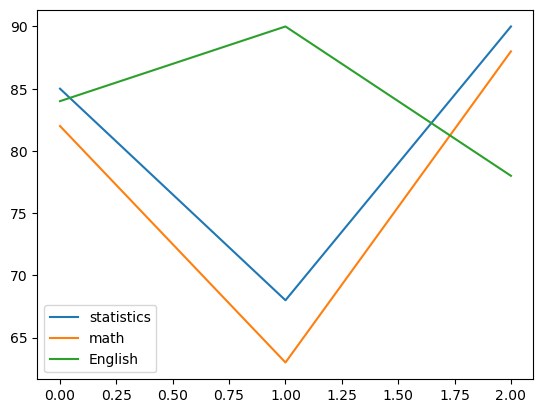

In [586]:
df.plot()

The above picture shows that the `plot` method of Pandas draw a line chart for each column.

<Axes: title={'center': 'My picture'}>

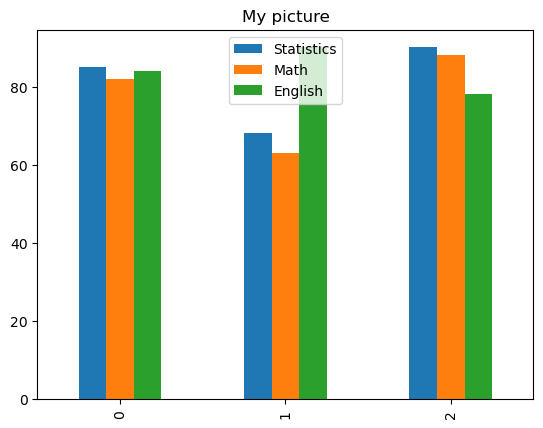

In [614]:
df.plot(kind="bar", title="My picture")  # draw the bar chart

array([<Axes: title={'center': 'Statistics'}>,
       <Axes: title={'center': 'Math'}>,
       <Axes: title={'center': 'English'}>], dtype=object)

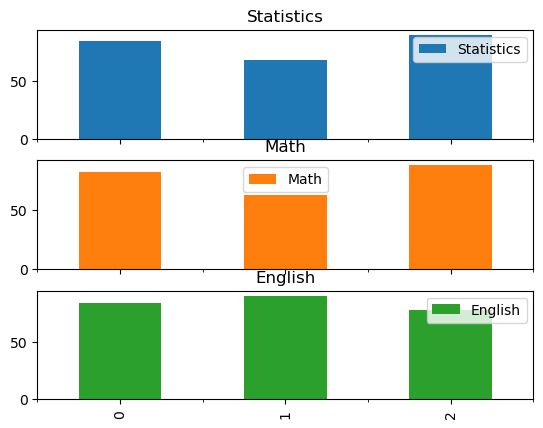

In [616]:
df.plot(kind="bar", subplots=True)  # generate subplots for each column

<Axes: xlabel='Math', ylabel='Statistics'>

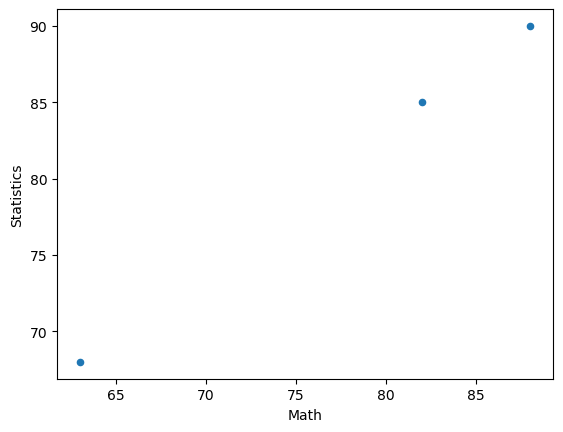

In [626]:
df.plot(x="Math", y="Statistics", kind="scatter")  # draw scatter chart with given axis


Pandas provides a comprehensive set of data processing methods with numerous argument configurations. Due to space limitations, this book does not elaborate on them in detail. When using Pandas for data processing, readers are encouraged to consult the [official documentation](https://pandas.pydata.org/docs/) for further reference.

## Exercises
<hr>

```{exercise}
:label: creat-df
How to creat a DataFrame for the following panel data?

|Nation|Capital|
|--|--|
|UK|London|
|US|Washington DC|
|China|Beijing|
```

````{solution} creat-df
:class: dropdown
```python
import pandas as pd

df = pd.DataFrame({'Nation': ['UK', 'US', 'China'], 'Capital': ['London', 'Washinton DC', 'Beijing']})
```

or
```python
import pandas as pd
import numpy as pd

data = np.array([['UK', 'US', 'China'], ['London', 'Washinton DC', 'Beijing']])
df = pd.DataFrame(data, columns=['Nation', 'Capital'])
```

````

```{exercise}
:label: read-csv
How to read a CSV file into a Pandas DataFrame?

A.&nbsp;&nbsp;  pd.load_csv()

B.&nbsp;&nbsp;  pd.read_csv()

C.&nbsp;&nbsp;  pd.open_csv()

D.&nbsp;&nbsp;  pd.import_csv()


```

````{solution} read-csv
:class: dropdown
B
````

```{exercise}
:label: row-index
What is the default index type when a DataFrame is created?

A.&nbsp;&nbsp;  Numeric index starting from 1

B.&nbsp;&nbsp;  Alphanumeric index based on row number

C.&nbsp;&nbsp;  Numeric index starting from 0

D.&nbsp;&nbsp;  Strings


```

````{solution} row-index
:class: dropdown
C
````

```{exercise}
:label: acess-data
How can you select a specific column 'Score' from a DataFrame 'df'?

A.&nbsp;&nbsp;  df('Score')

B.&nbsp;&nbsp;  df.select_column('Score')

C.&nbsp;&nbsp;  df.get_column('Score')

D.&nbsp;&nbsp;  df['Score']


```

````{solution} acess-data
:class: dropdown
D
````

```{exercise}
:label:  head-data
What is the purpose of the head() method in Pandas?

A.&nbsp;&nbsp;  To display the last few rows of a DataFrame

B.&nbsp;&nbsp;  To display the first few rows of a DataFrame

C.&nbsp;&nbsp;  To display summary statistics of a DataFrame

D.&nbsp;&nbsp;  To display maximums of a DataFrame


```

````{solution} head-data
:class: dropdown
B
````

```{exercise}
:label: shape
What does the shape attribute of a DataFrame represent??

A.&nbsp;&nbsp;  Get the number of rows and columns

B.&nbsp;&nbsp;  Get the number of cells

C.&nbsp;&nbsp;  Get the data types of columns

D.&nbsp;&nbsp;  Get the number of rows


```

````{solution} shape
:class: dropdown
A
````

```{exercise}
:label: filter
How can you filter rows in a DataFrame 'df' based on a condition 'condition'?

A.&nbsp;&nbsp;  df.filter(condition)

B.&nbsp;&nbsp;  df[condition]

C.&nbsp;&nbsp;  df.filter_rows(condition)

D.&nbsp;&nbsp;  df.select_rows(condition)


```

````{solution} filter
:class: dropdown
B
````

```{exercise}
:label: drop
How to drop a column 'name' from a DataFrame 'df' in Pandas?

A.&nbsp;&nbsp;  df.drop('name', axis=1)

B.&nbsp;&nbsp;  df.drop('name')

C.&nbsp;&nbsp;  df.remove('name', axis=1)

D.&nbsp;&nbsp;  df.remove('name')


```

````{solution} drop
:class: dropdown
A
````

```{exercise}
:label: describe
What is the purpose of the describe() method in Pandas?

A.&nbsp;&nbsp;  To describe the data types of columns

B.&nbsp;&nbsp;  To provide information about missing values

C.&nbsp;&nbsp;  To provide the size of the data

D.&nbsp;&nbsp;  To display summary statistics of a DataFrame


```

````{solution} describe
:class: dropdown
D
````

```{exercise}
:label: merge
How to merge two DataFrames based on a common column in Pandas?

A.&nbsp;&nbsp;  df.join()

B.&nbsp;&nbsp;  df.concate()

C.&nbsp;&nbsp;  df.combine()

D.&nbsp;&nbsp;  df.merge()

```

````{solution} merge
:class: dropdown
D
````

```{exercise}
:label: astype
What does the astype() method in Pandas do?

A.&nbsp;&nbsp;  Converts a DataFrame to a NumPy array

B.&nbsp;&nbsp;  Converts data types of columns in a DataFrame

C.&nbsp;&nbsp;  Adds a new column to a DataFrame

D.&nbsp;&nbsp;  Removes duplicate values from a DataFrame

```

````{solution} astype
:class: dropdown
B
````

```{exercise}
:label: apply
How to apply a custom function to each element in a Pandas DataFrame 'df'?

A.&nbsp;&nbsp;  df.apply()

B.&nbsp;&nbsp;  df.map()

C.&nbsp;&nbsp;  df.modify()

D.&nbsp;&nbsp;  df.call()

```

````{solution} apply
:class: dropdown
A
````

```{exercise}
:label: reset_index
How to reset the index of a Pandas DataFrame 'df'?

A.&nbsp;&nbsp;  df.set_index()

B.&nbsp;&nbsp;  df.reset_index()

C.&nbsp;&nbsp;  df.index_set()

D.&nbsp;&nbsp;  df.index_reset()

```

````{solution} reset_index
:class: dropdown
B
````

```{exercise}
:label: duplicate
How to remove duplicate values in a Pandas DataFrame 'df'?

A.&nbsp;&nbsp;  df.delete_duplicate()

B.&nbsp;&nbsp;  df.eliminate_duplicate()

C.&nbsp;&nbsp;  df.remove_duplicate()

D.&nbsp;&nbsp;  df.drop_duplicate()

```

````{solution} duplicate
:class: dropdown
D
````

```{exercise}
:label: missing-value
Which of the following method can handle missing values in a Pandas DataFrame 'df'?

A.&nbsp;&nbsp;  df.fillna()

B.&nbsp;&nbsp;  df.dropna()

C.&nbsp;&nbsp;  Both A and B

D.&nbsp;&nbsp;  Neither A and B

```

````{solution} missing-value
:class: dropdown
C
````

```{exercise}
:label: save
How to save a Pandas DataFrame 'df' to a CSV file 'data.csv'?

A.&nbsp;&nbsp;  df.save_csv('data.csv')

B.&nbsp;&nbsp;  df.to_csv('data.csv')

C.&nbsp;&nbsp;  df.csv('data.csv')

D.&nbsp;&nbsp;  df.export_csv('data.csv')

```

````{solution} save
:class: dropdown
B
````

```{exercise-start}
:label: pandas-read
```
For the following panel data:

|Student|Module1|Module2|Module3|
|--|--|--|--|
|Stu1| 50| 45 |56|
|Stu2| 81| 76 |73|
|Stu3| 60| 65 |62|
|Stu4| 77| 58 |60|
|Stu5| 60| 55 |53|
|Stu6| 40| 55 |53|
|Stu7| 57| 65 |70|

Use Pandas to achieve the following:

- Put the above panel data to a Pandas DataFrame.
- Drop the student row who has modul score less than 50 (< 50).
- Output the average score, maximum score of each module for the remnant students.
- Rank the remnant students by the average score of all modules.
- Output the final result to a csv file named 'output.csv'.

```{exercise-end}
```

````{solution} pandas-read
:class: dropdown

```python
import pandas as pd
import numpy as np

columns = ['Student', 'Module1', 'Module2', 'Module3']
np.array([['Stu1', 50, 45, 56], ['Stu2', 81, 76, 73]])

```
````

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>

<!-- Toogle google translation -->
<div id="google_translate_element"></div>
<script type="text/javascript">
      function googleTranslateElementInit() {
        new google.translate.TranslateElement({ pageLanguage: 'en',
                  includedLanguages: 'zh-CN,zh-TW,en,ja,ko,de,ru,fr,es,it,pt,hi,ar,fa',
layout: google.translate.TranslateElement.InlineLayout.SIMPLE }, 'google_translate_element');
      }
</script>
<script type="text/javascript"
      src="https://translate.google.com/translate_a/element.js?cb=googleTranslateElementInit"
></script>
<br>

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>